# AI info French Govermment

In [2]:
# pip install openpyxl
import pandas as pd
news = pd.read_excel("C:/Users/Jhonnatan/Documents/GitHub/Impact-of-AI-in-organizations/Datasets/AI_eco_gouvFR.xlsx")
news.head()
#research.describe()

,title,description,URL
0,Biocides,modifiant la directive 98/8/CE du Parlement eu...,https://www.economie.gouv.fr/dgccrf/publicatio...
1,Transformation numérique : les aides aux entre...,Francenum.gouv.fr propose des conseils concern...,https://www.economie.gouv.fr/cedef/aides-numer...
2,Rapports 2023,l'industrie de la santé chez Dassault Systèmes...,https://www.economie.gouv.fr/cge/rapports2023
3,Diversité et égalité des chances : Bercy accue...,Besoin en compétences : comment l'immigration ...,https://www.economie.gouv.fr/sommet-inclusion-...
4,Les enjeux de propriété intellectuelle dans l'...,Les enjeux de propriété intellectuelle dans l'...,https://www.economie.gouv.fr/apie/les-enjeux-d...


### Frequency of certain keywords in titles and descriptions.

The bar graphs above display the frequency of selected keywords in the titles and descriptions of the dataset. The first graph shows the counts for each keyword in the titles, while the second graph presents the counts for the descriptions.

This analysis provides an insight into the focus areas of the content published on the French Ministry of Economy, Finance, and Recovery's website. We can observe which topics are more frequently mentioned and potentially identify trends or priorities in the government's communication.

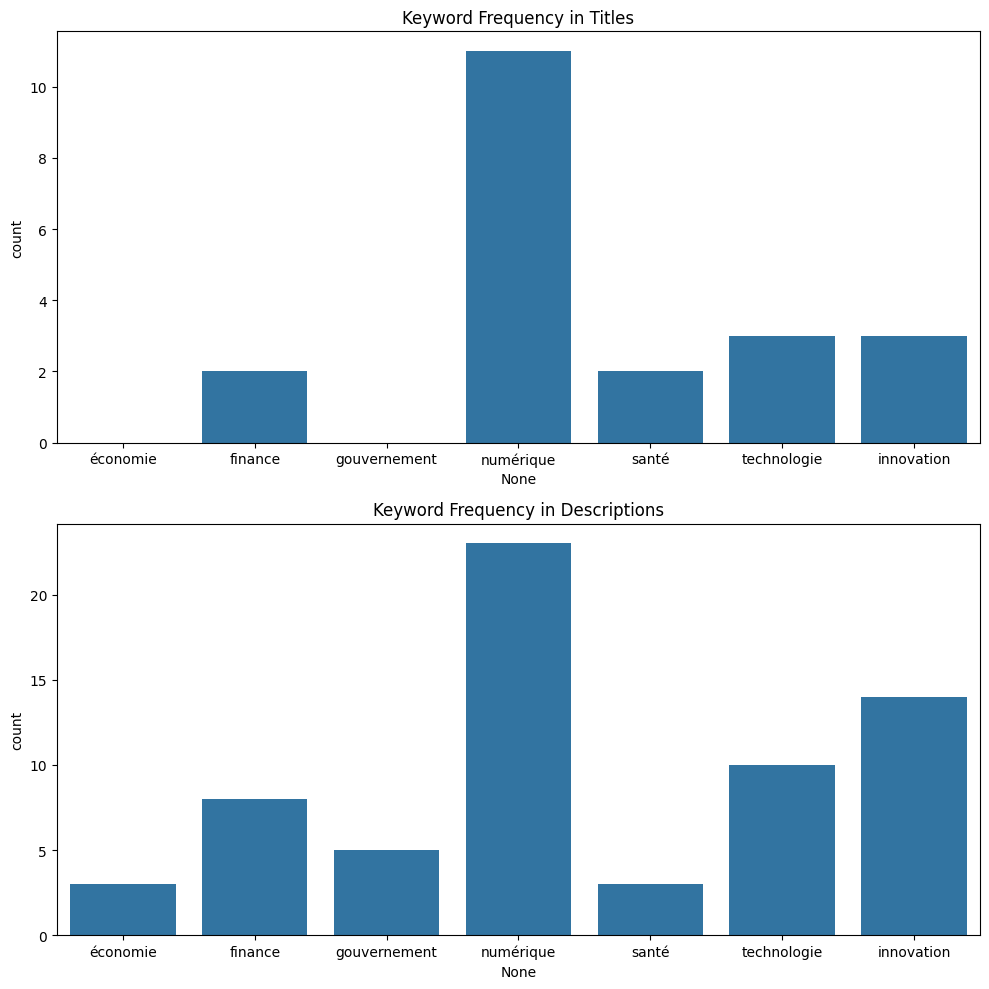

In [3]:


# Selecting keywords for analysis
keywords = ['économie', 'finance', 'gouvernement', 'numérique', 'santé', 'technologie', 'innovation']

# Function to count occurrences of keywords in a text
def count_keywords(text, keywords):
    text = text.lower()
    keyword_counts = Counter()
    for keyword in keywords:
        keyword_counts[keyword] = text.count(keyword)
    return keyword_counts

# Counting occurrences of keywords in titles and descriptions
title_keyword_counts = Counter()
description_keyword_counts = Counter()

for _, row in news.iterrows():
    title_keyword_counts.update(count_keywords(row['title'], keywords))
    description_keyword_counts.update(count_keywords(row['description'], keywords))

# Preparing data for plotting
title_counts_df = pd.DataFrame.from_dict(title_keyword_counts, orient='index', columns=['count'])
description_counts_df = pd.DataFrame.from_dict(description_keyword_counts, orient='index', columns=['count'])

# Plotting the data
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.barplot(ax=axes[0], x=title_counts_df.index, y='count', data=title_counts_df)
axes[0].set_title('Keyword Frequency in Titles')
sns.barplot(ax=axes[1], x=description_counts_df.index, y='count', data=description_counts_df)
axes[1].set_title('Keyword Frequency in Descriptions')

plt.tight_layout()
plt.show()


 ### Relationship between the length of the content and its thematic focus.

 The bar graphs above display the average length of titles and descriptions by different content categories. The first graph shows the average title length for each categories, and the second graph presents the average description length.

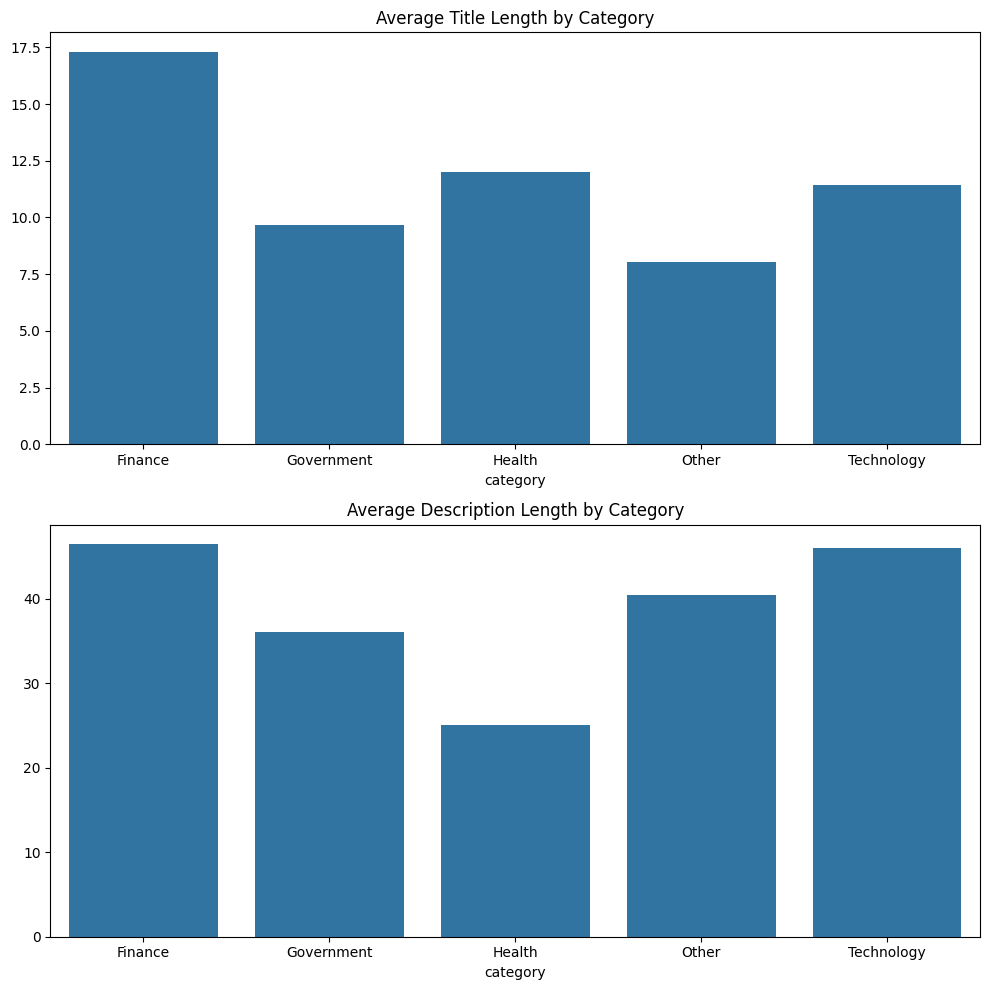

In [10]:
from nltk.tokenize import word_tokenize

# Define categories and their associated keywords
categories = {
    'Finance': ['finance', 'économie', 'budget', 'fiscal'],
    'Technology': ['numérique', 'technologie', 'innovation', 'digital'],
    'Health': ['santé', 'médical', 'soins'],
    'Government': ['gouvernement', 'politique', 'législation', 'régulation']
}

# Function to categorize content based on keywords
def categorize_content(text, categories):
    text = text.lower()
    for categories, keywords in categories.items():
        if any(keyword in text for keyword in keywords):
            return categories
    return 'Other'

# Simple method to count words in a text
def simple_word_count(text):
    return len(text.split())

# Calculate lengths using the simple method and categorize content
news['title_length'] = news['title'].apply(simple_word_count)
news['description_length'] = news['description'].apply(simple_word_count)
news['categories'] = news.apply(lambda x: categorize_content(x['title'] + ' ' + x['description'], categories), axis=1)

# Analyzing the relationship between length and categories
average_title_length = news.groupby('categories')['title_length'].mean()
average_description_length = news.groupby('categories')['description_length'].mean()

# Plotting the data
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.barplot(ax=axes[0], x=average_title_length.index, y=average_title_length.values)
axes[0].set_title('Average Title Length by categories')
sns.barplot(ax=axes[1], x=average_description_length.index, y=average_description_length.values)
axes[1].set_title('Average Description Length by categories')

plt.tight_layout()
plt.show()


In [13]:
df = news
# Ensure that the 'Abstract' column does not contain NaN values
df = df.dropna(subset=['description'])

In [15]:
# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to each abstract
df['Sentiment'] = df['description'].apply(calculate_sentiment)
# Aggregate Insights: Overall sentiment
average_sentiment = df['Sentiment'].mean()
print(f"Overall Sentiment: {average_sentiment:.2f}")

Overall Sentiment: 0.03


In [17]:
df

,title,description,URL,Sentiment
0,Biocides,modifiant la directive 98/8/CE du Parlement eu...,https://www.economie.gouv.fr/dgccrf/publicatio...,-0.133333
1,Transformation numérique : les aides aux entre...,Francenum.gouv.fr propose des conseils concern...,https://www.economie.gouv.fr/cedef/aides-numer...,0.000000
2,Rapports 2023,l'industrie de la santé chez Dassault Systèmes...,https://www.economie.gouv.fr/cge/rapports2023,0.000000
3,Diversité et égalité des chances : Bercy accue...,Besoin en compétences : comment l'immigration ...,https://www.economie.gouv.fr/sommet-inclusion-...,0.000000
4,Les enjeux de propriété intellectuelle dans l'...,Les enjeux de propriété intellectuelle dans l'...,https://www.economie.gouv.fr/apie/les-enjeux-d...,0.000000
...,...,...,...,...
93,Objets intelligents,navettes autonomes) : Alci (vision intelligent...,https://www.economie.gouv.fr/node/34044,0.000000
94,COP21 : les rendez-vous finance de la première...,"Étaient présents les présidents de la BERD, de...",https://www.economie.gouv.fr/cop21-les-rendez-...,0.000000
95,Une mission : la formation continue,Plus de 600 formations dans 22 thématiques : ...,https://www.economie.gouv.fr/igpde/mission-for...,0.050000
96,Affaires économiques - Réglementation et contr...,"Zuccarelli, commissaire aux prix, fixation des...",https://www.economie.gouv.fr/saef/affaires-eco...,0.000000


In [20]:
help(calculate_sentiment)

Help on function calculate_sentiment in module __main__:

calculate_sentiment(text)
    # Function to calculate sentiment polarity



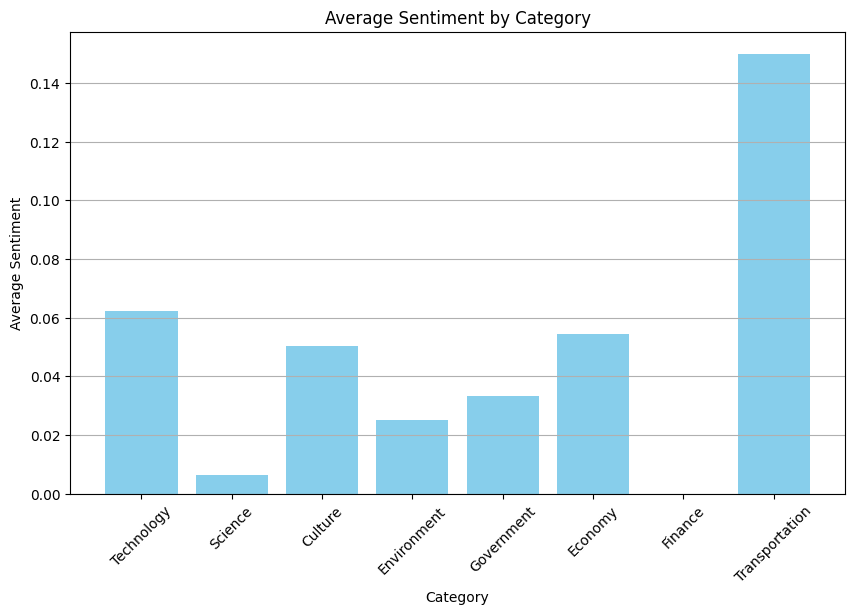

In [33]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

# Define categories and their associated keywords
categories = {
    'Finance': ['finance', 'économie', 'budget', 'fiscal'],
    'Technology': ['numérique', 'technologie', 'innovation', 'digital'],
    'Government': ['gouvernement', 'politique', 'législation', 'régulation'],
    'Environment': ['environnement', 'climat', 'durable', 'écologie'],
    'Economy': ['économique', 'croissance', 'chômage', 'inflation'],
    'Culture': ['culture', 'art', 'tradition', 'littérature'],
    'Science': ['science', 'recherche', 'découverte', 'technologie'],
    'Transportation': ['transport', 'véhicule', 'infrastructure', 'public'],
}

# Initialize a dictionary to hold sentiment sums and article counts for each category
category_sentiments = defaultdict(lambda: {'sentiment_sum': 0, 'article_count': 0})

for _, row in df.iterrows():
    article_categories = set()  # To keep track of categories each article belongs to
    combined_text = (row['title'] + " " + row['description']).lower()
    
    # Determine the article's categories based on keywords
    for category, keywords in categories.items():
        if any(keyword in combined_text for keyword in keywords):
            article_categories.add(category)
    
    # Update sentiment sums and article counts for the categories the article belongs to
    for category in article_categories:
        category_sentiments[category]['sentiment_sum'] += row['Sentiment']
        category_sentiments[category]['article_count'] += 1

# Calculate average sentiment per category
average_sentiments = {category: details['sentiment_sum'] / details['article_count']
                      for category, details in category_sentiments.items() if details['article_count'] > 0}

# Convert to DataFrame for plotting
average_sentiments_df = pd.DataFrame(list(average_sentiments.items()), columns=['Category', 'Average Sentiment'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_sentiments_df['Category'], average_sentiments_df['Average Sentiment'], color='skyblue')
plt.title('Average Sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
